In [1]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 6.9 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
from fbprophet import Prophet
import pandas as pd,matplotlib.pyplot as plt, yfinance as yf
import datetime as dt

In [ ]:
start_date = start = dt.datetime(2021, 4, 1)
end = dt.datetime(2022, 4, 30)
df = yf.download('BTC-USD',start_date,end)

[*********************100%***********************]  1 of 1 completed


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-01,58926.562500,59586.070312,58505.277344,59095.808594,59095.808594,61669163792
2021-04-02,59098.878906,60267.187500,58869.281250,59384.312500,59384.312500,58727860620
2021-04-03,59397.410156,60110.269531,57603.890625,57603.890625,57603.890625,59641344484
2021-04-04,57604.839844,58913.746094,57168.675781,58758.554688,58758.554688,50749662970
2021-04-05,58760.875000,59891.296875,57694.824219,59057.878906,59057.878906,60706272115
...,...,...,...,...,...,...
2022-04-26,40448.421875,40713.890625,37884.984375,38117.460938,38117.460938,34569088416
2022-04-27,38120.300781,39397.917969,37997.312500,39241.121094,39241.121094,30981015184
2022-04-28,39241.429688,40269.464844,38941.421875,39773.828125,39773.828125,33903704907


In [ ]:
df.reset_index(inplace = True)
df = df[['Date','Adj Close']]

In [ ]:
df

,Date,Adj Close
0,2021-04-01,59095.808594
1,2021-04-02,59384.312500
2,2021-04-03,57603.890625
3,2021-04-04,58758.554688
4,2021-04-05,59057.878906
...,...,...
390,2022-04-26,38117.460938
391,2022-04-27,39241.121094
392,2022-04-28,39773.828125
393,2022-04-29,38609.824219


In [ ]:
df.columns = ['ds','y']

In [ ]:
df

,ds,y
0,2021-04-01,59095.808594
1,2021-04-02,59384.312500
2,2021-04-03,57603.890625
3,2021-04-04,58758.554688
4,2021-04-05,59057.878906
...,...,...
390,2022-04-26,38117.460938
391,2022-04-27,39241.121094
392,2022-04-28,39773.828125
393,2022-04-29,38609.824219


In [ ]:
model = Prophet()

In [ ]:
model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
model.component_modes

{'additive': ['weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [ ]:
df.tail()

,ds,y
390,2022-04-26,38117.460938
391,2022-04-27,39241.121094
392,2022-04-28,39773.828125
393,2022-04-29,38609.824219
394,2022-04-30,37714.875000


In [ ]:
future_dates = model.make_future_dataframe(periods = 120)

In [ ]:
future_dates.tail()

,ds
510,2022-08-24
511,2022-08-25
512,2022-08-26
513,2022-08-27
514,2022-08-28


In [ ]:
predection = model.predict(future_dates)

In [ ]:
predection.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
510,2022-08-24,41060.007833,24408.258597,57154.551283,24091.052514,57171.506797,182.346960,182.346960,182.346960,182.346960,182.346960,182.346960,0.0,0.0,0.0,41242.354793
511,2022-08-25,41059.908361,23554.477889,58084.678882,23880.250381,57471.302458,-115.504247,-115.504247,-115.504247,-115.504247,-115.504247,-115.504247,0.0,0.0,0.0,40944.404114
512,2022-08-26,41059.808889,23198.734981,58212.046354,23529.804463,57592.617131,-149.252743,-149.252743,-149.252743,-149.252743,-149.252743,-149.252743,0.0,0.0,0.0,40910.556146
513,2022-08-27,41059.709417,23938.932642,57493.990357,23254.866730,57622.703052,-153.734823,-153.734823,-153.734823,-153.734823,-153.734823,-153.734823,0.0,0.0,0.0,40905.974594
514,2022-08-28,41059.609945,22624.711749,57502.144958,23113.522998,57652.788974,27.167051,27.167051,27.167051,27.167051,27.167051,27.167051,0.0,0.0,0.0,41086.776996


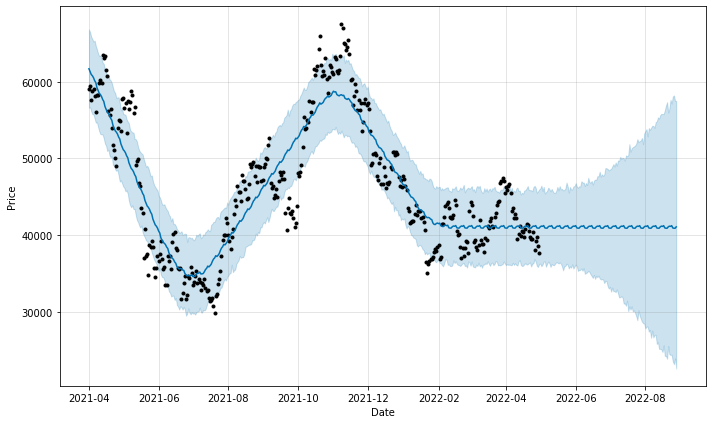

In [ ]:
figure = model.plot(predection, xlabel='Date', ylabel='Price')

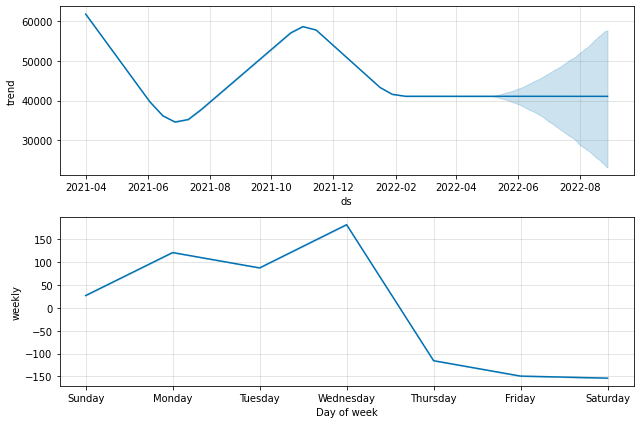

In [ ]:
figure3 = model.plot_components(predection)

In [ ]:
predection.tail(30)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
485,2022-07-30,41062.494634,28534.053783,51870.728380,29266.230591,51737.125051,-153.734823,-153.734823,-153.734823,-153.734823,-153.734823,-153.734823,0.0,0.0,0.0,40908.759811
486,2022-07-31,41062.395162,28481.796494,53277.816272,29002.266836,51952.912523,27.167051,27.167051,27.167051,27.167051,27.167051,27.167051,0.0,0.0,0.0,41089.562212
487,2022-08-01,41062.295690,27857.019051,53578.862689,28797.501316,52104.396498,121.295031,121.295031,121.295031,121.295031,121.295031,121.295031,0.0,0.0,0.0,41183.590721
488,2022-08-02,41062.196218,28095.997276,53824.662606,28601.825483,52280.636217,87.682771,87.682771,87.682771,87.682771,87.682771,87.682771,0.0,0.0,0.0,41149.878989
489,2022-08-03,41062.096746,28072.075872,52868.326367,28479.412253,52414.748111,182.346960,182.346960,182.346960,182.346960,182.346960,182.346960,0.0,0.0,0.0,41244.443706
490,2022-08-04,41061.997274,27429.961897,53962.265298,28266.751836,52722.612918,-115.504247,-115.504247,-115.504247,-115.504247,-115.504247,-115.504247,0.0,0.0,0.0,40946.493027
491,2022-08-05,41061.897802,27653.558869,53734.274260,28101.587062,52899.804753,-149.252743,-149.252743,-149.252743,-149.252743,-149.252743,-149.252743,0.0,0.0,0.0,40912.645059
492,2022-08-06,41061.798330,26632.212196,53998.221980,27859.620798,53149.758590,-153.734823,-153.734823,-153.734823,-153.734823,-153.734823,-153.734823,0.0,0.0,0.0,40908.063506
493,2022-08-07,41061.698858,27566.553693,54259.720975,27698.883156,53283.857488,27.167051,27.167051,27.167051,27.167051,27.167051,27.167051,0.0,0.0,0.0,41088.865908
494,2022-08-08,41061.599386,26673.009996,54248.925374,27539.290690,53434.076520,121.295031,121.295031,121.295031,121.295031,121.295031,121.295031,0.0,0.0,0.0,41182.894417


In [ ]:
predection[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
510,2022-08-24,41242.354793,24408.258597,57154.551283
511,2022-08-25,40944.404114,23554.477889,58084.678882
512,2022-08-26,40910.556146,23198.734981,58212.046354
513,2022-08-27,40905.974594,23938.932642,57493.990357
514,2022-08-28,41086.776996,22624.711749,57502.144958


In [ ]:
metric_df = predection.set_index('ds')[['yhat']].join(df.set_index('ds').y).reset_index()

In [ ]:
metric_df.tail()

,ds,yhat,y
510,2022-08-24,41242.354793,NaN
511,2022-08-25,40944.404114,NaN
512,2022-08-26,40910.556146,NaN
513,2022-08-27,40905.974594,NaN
514,2022-08-28,41086.776996,NaN


In [ ]:
metric_df.dropna(inplace=True)

In [ ]:
metric_df.tail()

,ds,yhat,y
390,2022-04-26,41159.627246,38117.460938
391,2022-04-27,41254.191963,39241.121094
392,2022-04-28,40956.241285,39773.828125
393,2022-04-29,40922.393316,38609.824219
394,2022-04-30,40917.811764,37714.875000


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
r2_score(metric_df.y, metric_df.yhat)

0.8163845678983045

In [ ]:
mean_squared_error(metric_df.y, metric_df.yhat)

14430980.70976168

In [ ]:
mean_absolute_error(metric_df.y, metric_df.yhat)

3047.744647256686